In [12]:
#DBSCAN測試
X = np.array([[1, 2, 3], [2, 2, 3], [2, 3, 10],[8, 7,7], [8, 8,7], [25, 80,10]])
clustering = DBSCAN(eps=3, min_samples=2)
clustering.fit(X)
Y_pred = clustering.labels_

##  import套件

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
#import datetime
import matplotlib.pyplot as plt

## 刪除2018年之前之訂單資料

In [2]:
name = input() #OrderData  & OrderSlavedata 
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name+".csv")

#將字串轉成datetime格式
df["TradesDateTime"] = pd.to_datetime(df["TradesDateTime"])

#建立日期上下界
start_time = pd.to_datetime("2018-06-06")
end_time = pd.to_datetime("2020-05-01")

#日期在上下界以內的資料會判斷為True,反之則是False,將此pd.Serise存到date_list
date_list = df["TradesDateTime"].between(start_time,end_time)

#在建立一個date_list_F，存放False值的所在位置(index),後將這些位置的row刪掉
date_list_F = []
for i in range(len(df)):
    if date_list[i] == False:
        date_list_F.append(i)
        
df = df.drop(date_list_F)

訂單整合


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
#輸入欲寫入的檔名(預設為name_new)
name = input()
df.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name+"_new"+".csv",index=False,sep=',')

OrderSlaveData


In [ ]:
#清除變數
del df,date_list_F,date_list

## 合併會員&訂單資料

In [2]:
name1 = input()#OrderData
name2 = input()#OrderSlaveData
name3 = input()#MemberData
df_OrderData = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name1+"_new.csv")#OrderData
df_OrderSlaveData = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name2+"_new.csv")#OrderSlaveData
df_MemberData = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name3+".csv")#MemberData

OrderData
OrderSlaveData
MemberData


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#用pd.merge合併主單&子單欄位，並設定 how = "right"，以子單row為主
df = pd.merge(df_OrderData,df_OrderSlaveData , how = "right",on =["TradesGroupCode","Status"],
              suffixes = ("_OrderData","_OrderSlaveData"),copy = False)

In [15]:
#清除多餘欄位
drop_list  = ["Unnamed: 0","TradesDateTime_OrderData","ChannelType_OrderData","ChannelDetail_OrderData","PaymentType_OrderData",
          "ShippingType_OrderData","Qty_OrderData","TotalSalesAmount_OrderData","TotalPrice_OrderData",
          "TotalDiscount_OrderData","MemberID_OrderData"]

df = df.drop(drop_list,axis = 1)
#去重複資料
df = df.drop_duplicates()
#寫入檔案
df.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/訂單整合.csv")

In [3]:
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/訂單整合.csv")

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df

,Unnamed: 0,TradesGroupCode,TsCount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,TradesDateTime_OrderSlaveData,ChannelType_OrderSlaveData,ChannelDetail_OrderSlaveData,PaymentType_OrderSlaveData,ShippingType_OrderSlaveData,OuterProductSkuCode,ProductSkuCode,SalePageCode,Qty_OrderSlaveData,TotalSalesAmount_OrderSlaveData,TotalPrice_OrderSlaveData,TotalDiscount_OrderSlaveData,MemberID_OrderSlaveData
0,0,TG190926B00185,1.0,0.0,0.0,0.0,Finish,2019-09-26 01:15:10.297,OfficialECom,MobileWeb,JKOPay,Home,WEDDING02,16976115.0,5724844.0,1,680,680,0,JAE7ypAI%2BmBkMAd1REpPJI3zcEQBI9WBTeg5QlsEri4%3D
1,1,TG190926X00450,4.0,0.0,-100.0,0.0,Finish,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,8309-3WH34,11397813.0,3904262.0,1,2660,2760,-100,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
2,2,TG190926X00450,4.0,0.0,-100.0,0.0,Finish,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,SSS84,16578545.0,5575777.0,1,2660,2760,-100,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
3,3,TG190926X00450,4.0,0.0,-100.0,0.0,Finish,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,592-1WH34,5188379.0,1747084.0,1,2660,2760,-100,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
4,4,TG190926X00450,4.0,0.0,-100.0,0.0,Finish,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,SSS88,16998530.0,5731137.0,1,2660,2760,-100,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487196,488002,TG190126B00199,NaN,NaN,NaN,NaN,New,2019-01-26 01:11:11.757,OfficialECom,AndroidApp,CreditCardInstallment,Home,9021-511PK42,15112383.0,5106421.0,1,1332,1480,-148,pH8g6FwlGXppf%2Fs14GxumZ23DY5rT%2BEn0a1rCl0Ow7...
487197,488003,TG190127X01111,NaN,NaN,NaN,NaN,New,2019-01-27 21:35:13.863,OfficialECom,iOSApp,CreditCardInstallment,Home,2010-21ABK43,7401264.0,2681336.0,1,2080,2180,-100,CK0E29CksFr6iItHr87dDoWAYpqaWZnOzc7ttZLTFTA%3D
487198,488004,TG190127Y00765,NaN,NaN,NaN,NaN,New,2019-01-27 22:23:22.003,OfficialECom,iOSApp,CreditCardInstallment,Home,AKT-38WN38,14736177.0,4988569.0,1,1880,1980,-100,sQ6LZBUjeKVV0X%2Fr0I7aVcZwIxPuIJCxLPMEMVkFa2I%3D
487199,488005,TG190127S00156,NaN,NaN,NaN,NaN,New,2019-01-27 16:06:41.317,OfficialECom,iOSApp,CreditCardInstallment,Home,M129-1CF40,14893184.0,5036887.0,1,1780,1880,-100,jxYhHrEqmnI43qyBLvKlZQ%3D%3D


In [6]:
#去重複
df_MemberData = df_MemberData.drop_duplicates()
df_MemberData.reset_index(drop=True, inplace=True)
#只保留有在訂單裡的會員資訊
member_in_orderdata = df_MemberData["MemberID"].isin(k)

drop_list_1 = []
for i in range(len(member_in_orderdata)):
    if member_in_orderdata[i] == False:
        drop_list_1.append(i)
df_MemberData = df_MemberData.drop(drop_list_1)

#合併訂單與會員資料
df_F = pd.merge(df,df_member,left_on = 'MemberID_OrderSlaveData',right_on = "MemberID",how = "inner")
#去重複
df_F = df_F.drop_duplicates()
#寫入CSV
df_F.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/訂單整合會員版.csv",index = False)

In [ ]:
del df,k,member,df_OrderData,df_OrderSlaveData,df_MemberData

## 行為資料前處理&篩選

In [ ]:
#輸入要處理的行為資料集名稱(先前已合併過2018-2020的資料集)
name = input()
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name+".csv")
#去空值(未登入會員之紀錄)
drop_list = []
for i in range(len(df)):
    if pd.isnull(df.iloc[i]["uid"]) == True :
        drop_list.append(i)
        
df = df.drop(drop_list)
#寫入新的CSV
name = input()
df.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name+"_new"+".csv",index=False,sep=',')

## 抽取行為資料

In [3]:
#讀入先前寫出的會員&主單%子單合併檔
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/訂單整合會員版.csv")

In [4]:
#照會員分組
member = df.groupby("MemberID_OrderSlaveData")
#把會員ID取出存成list K
k = member.groups.keys()
k = list(k)
k = pd.Series(k)

In [7]:
#調出某會員的所有訂單資訊
member.get_group(k[0])

,Unnamed: 0,TradesGroupCode,TsCount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,TradesDateTime_OrderSlaveData,ChannelType_OrderSlaveData,ChannelDetail_OrderSlaveData,...,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,MemberID,eland_uuid
484148,468628,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,2019-06-25 15:25:06.040,Female,1973-09-30,True,True,True,True,10,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,NaN
484149,468629,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,2019-06-25 15:25:06.040,Female,1973-09-30,True,True,True,True,10,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,NaN
484150,468630,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,2019-06-25 15:25:06.040,Female,1973-09-30,True,True,True,True,10,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,NaN
484151,468631,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,2019-06-25 15:25:06.040,Female,1973-09-30,True,True,True,True,10,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,NaN
484152,468632,TG190626A00622,2.0,135.0,54.0,0.0,Return,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,2019-06-25 15:25:06.040,Female,1973-09-30,True,True,True,True,10,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,NaN
484153,468633,TG190626A00622,2.0,135.0,54.0,0.0,Return,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,2019-06-25 15:25:06.040,Female,1973-09-30,True,True,True,True,10,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,NaN


In [28]:
#讀取去空值後的行為資料
name = input() # productPageView , addToCart
bh = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name+"_new.csv")

#照會員ID分組
bh = bh.groupby("uid")

#只取有訂單內會員的行為資料
t =bh["uid"].isin(k)
drop_list_1 = []
#若該行為資料的ID不在訂單裡，則排除掉(增加運算速度)
for i in range(len(t)):
    if t[i] == False:
        drop_list_1.append(i)
bh = bh.drop(drop_list_1)
#再次寫出
bh.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/"+name+"_new.csv",index = False)

In [18]:
#調出該會員的所有行為資料(瀏覽行為)
bh.get_group(k[6865]).iloc[0]

mid                                                   123
dc                                                    app
did                  29e5f322-5dfb-4bf4-90a8-700763bbdd92
uid      2VUAOohlQk9HVCJs1PJ6ElzIPQWoWZoFOiRA%2FjWM4Fg%3D
ht                                          1570540761145
ul                                                  zh-TW
geoid                                                  TW
bh                                                    add
pr1id                                         5.70688e+06
pr1pr                                                1480
pr1qt                                                   1
cu                                                    TWD
Name: 5535, dtype: object

In [ ]:
del bh,k,t

## 建立會員-瀏覽商品到放入購物車之平均時間

In [2]:
#讀取要的行為資料集&訂單整合資料集
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/訂單整合會員版.csv")
cart = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/addToCart_new.csv")
view = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/productPageView_new.csv")

In [3]:
#清理df欄位
drop_list = ['eland_uuid','Birthday','MemberCardLevel','IsEnableShortMessage','IsEnablePushNotification',
            'Gender','Birthday','IsAppInstalled','IsEnableEmail','RegisterDateTime','RegisterSourceTypeDef',
            ]
df = df.drop(drop_list,axis= 1)
df = df.groupby('MemberID_OrderSlaveData')
#把會員ID取出存成member
member = df.groups.keys()
member = list(member)
member = pd.Series(member)

#清理view欄位
drop_view_list = ['mid','dc','did','ul','geoid','bh','cu']
view = view.drop(drop_view_list,axis= 1)
view = view.groupby('uid')

#清理cart欄位
drop_cart_list = ['mid','dc','did','ul','geoid','bh','cu']
cart = cart.drop(drop_cart_list,axis= 1)
cart = cart.groupby('uid')

In [ ]:
#建立會員-瀏覽到放入購物車平均時間之datafram
final = pd.DataFrame({"memberID":[],"瀏覽到放入購物車平均時間":[]})

for  h in range(len(member)):
    if h % int(len(member)/100) == 0:       #進度顯示 
        print(h/int(len(member)/100),"%")   #進度顯示
    try:
        member_average = []
        pr1id_n = []
        for i in range(len(cart.get_group(member[h])["pr1id"])) : #會員N的購物車紀錄，隨商品名(這邊假設為A)逐條查詢
            l = []
            x = (view.get_group(member[h])["pr1id"] == cart.get_group(member[h])["pr1id"].iloc[i])
            for j in view.get_group(member[h])["ht"][x]: #商品A的瀏覽紀錄(時間)，逐條查詢
                if cart.get_group(member[h])["ht"].iloc[i] > j : #若為負值則不列入計算
                    l.append((cart.get_group(member[h])["ht"].iloc[i] - j)/1000) #把時間差加入List
            l = pd.Series(l)
            l = l.mean()
            pr1id_n.append(l)
            pr1id_n_Series = pd.Series(pr1id_n)
        member_average.append(member[h])
        member_average.append(pr1id_n_Series.mean())
        final.loc[h] = member_average
    except KeyError :
        member_average.append(member[h])
        member_average.append("novalue")
        final.loc[h] = member_average
        continue

final.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/瀏覽到放入購物車平均時間_去負值.csv",encoding = "utf_8_sig")

In [16]:
del final,member,df,view,cart

## 從加入購物車到訂單交易之平均時間

In [4]:
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/訂單整合會員版.csv")
cart = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/addToCart_new.csv")

In [5]:
#清理df欄位
drop_list = ['eland_uuid','Birthday','MemberCardLevel','IsEnableShortMessage','IsEnablePushNotification',
            'Gender','Birthday','IsAppInstalled','IsEnableEmail','RegisterDateTime','RegisterSourceTypeDef',
            ]
df = df.drop(drop_list,axis= 1)
df = df.groupby('MemberID_OrderSlaveData')
#把會員ID取出存成member
member = df.groups.keys()
member = list(member)
member = pd.Series(member)

#清理cart欄位
drop_cart_list = ['mid','dc','did','ul','geoid','bh','cu']
cart = cart.drop(drop_cart_list,axis= 1)
cart = cart.groupby('uid')

In [29]:
df.get_group(member[0])

,Unnamed: 0,TradesGroupCode,TsCount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,TradesDateTime_OrderSlaveData,ChannelType_OrderSlaveData,ChannelDetail_OrderSlaveData,...,ShippingType_OrderSlaveData,OuterProductSkuCode,ProductSkuCode,SalePageCode,Qty_OrderSlaveData,TotalSalesAmount_OrderSlaveData,TotalPrice_OrderSlaveData,TotalDiscount_OrderSlaveData,MemberID_OrderSlaveData,MemberID
484148,468628,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,AAA01F,87783.0,41488.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484149,468629,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,5126-5WH39,10208380.0,3530548.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484150,468630,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,SSS34,11538599.0,3943367.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484151,468631,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,002-5WH38,14552252.0,4935471.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484152,468632,TG190626A00622,2.0,135.0,54.0,0.0,Return,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,SSS34,11538599.0,3943367.0,-1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484153,468633,TG190626A00622,2.0,135.0,54.0,0.0,Return,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,5126-5WH39,10208380.0,3530548.0,-1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...


In [120]:
#建立會員-放入購物車到下訂平均時間之datafram
final = pd.DataFrame({"memberID":[],"瀏覽到放入購物車平均時間":[]})
for h in range(len(member)):
    if h % int(len(member)/100) == 0:       #進度顯示 
        print(h/int(len(member)/100),"%")   #進度顯示
    try:
        member_average = []
        pr1id_n = []
        for i in range(len(cart.get_group(member[h])["pr1id"])) : #會員N的購物車紀錄，隨商品名(這邊假設為A)逐條查詢
            l = []
            x = (df.get_group(member[h])["SalePageCode"] == cart.get_group(member[h])["pr1id"].iloc[i])
            for j in df.get_group(member[h])["TradesDateTime_OrderSlaveData"][x]: #商品A的瀏覽紀錄(時間)，逐條查詢
                if (cart.get_group(member[h])["ht"].iloc[i]/1000) < pd.to_datetime(j).timestamp() : #若為負值則不列入計算
                    l.append(pd.to_datetime(j).timestamp()-((cart.get_group(member[h])["ht"].iloc[i])/1000)) #把時間差加入List
            l = pd.Series(l)
            l = l.mean()
            pr1id_n.append(l)
            pr1id_n_Series = pd.Series(pr1id_n)
        member_average.append(member[h])
        member_average.append(pr1id_n_Series.mean())
        final.loc[h] = member_average
    except KeyError :
        member_average.append(member[h])
        member_average.append("novalue")
        final.loc[h] = member_average
        continue
final.to_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/放入購物車到下定之平均時間_去負值.csv",encoding = "utf_8_sig")

0.0 %
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %
100.0 %


In [121]:
final

,memberID,瀏覽到放入購物車平均時間
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,40422.4
1,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,171394
2,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,29023.3
3,%2B%2B8NpYVoqyjmc8mROiPMlX%2F2J8JlOghaysSF3qbY...,113259
4,%2B%2B8lPULC%2BdY%2F3MWf4kbymzr1cx%2B3Eaktr2fv...,29724.6
...,...,...
98657,zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU%2F2OVSU%3D,novalue
98658,zzvTsLQAKUueMvz%2Bvx%2FYptKHZIMMEu7nSWnkOiBhtR...,149689
98659,zzw%2Bk3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g%3D,142167
98660,zzw9O6yOUvVbxgrvUGCnmjjacARx%2FbQ%2F12aZDz27Tb...,NaN


In [75]:
df.get_group(member[0])

,Unnamed: 0,TradesGroupCode,TsCount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,TradesDateTime_OrderSlaveData,ChannelType_OrderSlaveData,ChannelDetail_OrderSlaveData,...,ShippingType_OrderSlaveData,OuterProductSkuCode,ProductSkuCode,SalePageCode,Qty_OrderSlaveData,TotalSalesAmount_OrderSlaveData,TotalPrice_OrderSlaveData,TotalDiscount_OrderSlaveData,MemberID_OrderSlaveData,MemberID
484148,468628,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,AAA01F,87783.0,41488.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484149,468629,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,5126-5WH39,10208380.0,3530548.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484150,468630,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,SSS34,11538599.0,3943367.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484151,468631,TG190626A00622,4.0,-250.0,-100.0,0.0,Finish,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,002-5WH38,14552252.0,4935471.0,1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484152,468632,TG190626A00622,2.0,135.0,54.0,0.0,Return,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,SSS34,11538599.0,3943367.0,-1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...
484153,468633,TG190626A00622,2.0,135.0,54.0,0.0,Return,2019-06-26 00:31:11.430,OfficialECom,AndroidApp,...,FamilyPickup,5126-5WH39,10208380.0,3530548.0,-1,2850,3200,-350,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...


## 將上面兩份excel合併後，進行分群

In [ ]:
#讀取合併後的檔案
df = pd.read_csv("D:/UserData/Desktop/big data/91ForNTUDataSet/91ForNTUDataSet/會員兩個維度.csv",encoding = "big5")
#清理欄位
df = df.drop("Unnamed: 0",axis = 1)
df = df.rename(columns = {"瀏覽到放入購物車平均時間" : "放入購物車到下定之平均時間","瀏覽到放入購物車平均時間.1" : "瀏覽到放入購物車平均時間"})
#清理空值
drop_list =[]
for i in range(len(df)):
    if str(df["放入購物車到下定之平均時間"].iloc[i]) == "nan" or str(df["放入購物車到下定之平均時間"].iloc[i]) == "novalue" or str(df["瀏覽到放入購物車平均時間"].iloc[i]) == "nan" or str(df["瀏覽到放入購物車平均時間"].iloc[i]) == "novalue":
        drop_list.append(i)
df_dropped = df.drop(drop_list)
df_dropped = df_dropped.drop("memberID",axis = 1)

#將秒數由字串型態轉為浮點數
for i in range(len(df_dropped)):
    df_dropped["放入購物車到下定之平均時間"].iloc[i] = float(df_dropped["放入購物車到下定之平均時間"].iloc[i])
    df_dropped["瀏覽到放入購物車平均時間"].iloc[i] = float(df_dropped["瀏覽到放入購物車平均時間"].iloc[i])

In [ ]:
#將秒數轉換為Z分數
x_norm = []
y_norm = []
x_mean =  df_dropped["放入購物車到下定之平均時間"].mean()
x_std = df_dropped["放入購物車到下定之平均時間"].std()
y_mean =  df_dropped["瀏覽到放入購物車平均時間"].mean()
y_std = df_dropped["瀏覽到放入購物車平均時間"].std()

for i in range(len(df_dropped)):
    x_norm.append((df_dropped["放入購物車到下定之平均時間"].iloc[i] - x_mean)/x_std)
    y_norm.append((df_dropped["瀏覽到放入購物車平均時間"].iloc[i] - y_mean)/y_std)
    
x_norm = pd.Series(x_norm)
y_norm = pd.Series(y_norm)

In [ ]:
#建立分群模型可以讀入的datafram格式
df = pd.DataFrame({"放入購物車到下定之平均時間":x_norm,"瀏覽到放入購物車平均時間":y_norm})
df

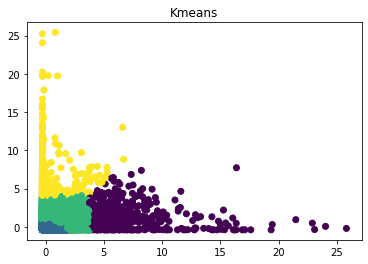

In [19]:
#Kmeans N=4
y_pred = KMeans(n_clusters = 4).fit_predict(df)
plt.scatter(x_norm, y_norm, c=y_pred)
plt.title(u'Kmeans')

plt.show()

In [ ]:
#DBSCAN
plt.style.use("ggplot")

y_pred = DBSCAN(eps=0.15, min_samples=15).fit_predict(df)


plt.xlim(-1,10)
plt.ylim(-1,10)
        
plt.scatter(x_norm,y_norm,c = y_pred,alpha = 0.1)

plt.show()

In [37]:
y_pred.sort()

In [38]:
y_pred

array([-1, -1, -1, ...,  4,  4,  4], dtype=int64)